Predicted probabilities y_hat: [7.000e-04 9.996e-01 9.991e-01 5.000e-04]
Rounded predictions: [0 1 1 0]
True labels y: [0. 1. 1. 0.]


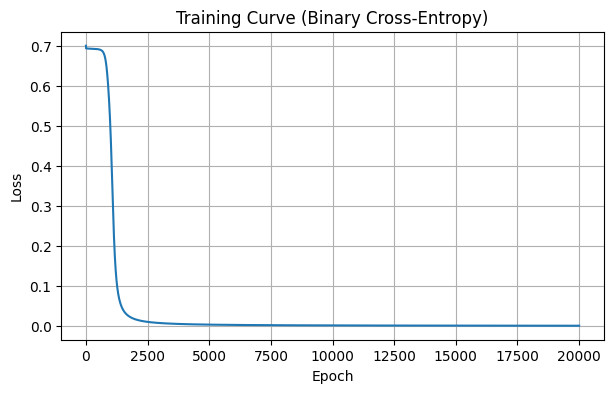

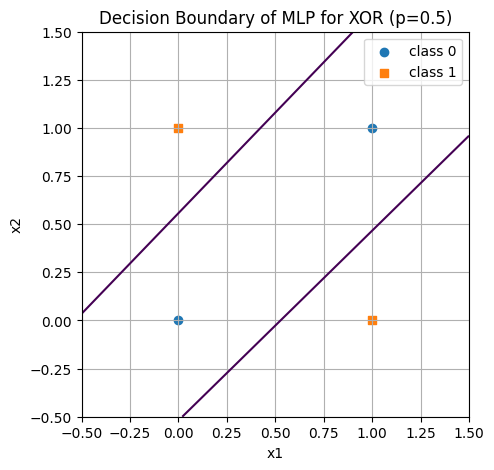

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- 1) XOR DATA ----------------
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)   # input data (4 samples, 2 features)
y = np.array([[0],[1],[1],[0]], dtype=np.float32)           # target outputs (4 samples, 1 output)

# ---------------- 2) PARAMETERS ----------------
np.random.seed(7)
H = 4              # number of neurons in the hidden layer
lr = 0.5           # learning rate
epochs = 20000     # number of training epochs

# ---------------- 3) INITIALIZATION ----------------
W1 = np.random.randn(2, H) * 0.5   # weights from input to hidden layer
b1 = np.zeros((1, H))              # biases for hidden layer
W2 = np.random.randn(H, 1) * 0.5   # weights from hidden to output layer
b2 = np.zeros((1, 1))              # bias for output neuron

# ---------------- 4) ACTIVATION FUNCTIONS ----------------
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))   # sigmoid activation

def sigmoid_derivative(a):
    return a * (1.0 - a)              # derivative of sigmoid for backpropagation

# ---------------- 5) TRAINING (Binary Cross-Entropy) ----------------
m = X.shape[0]         # number of samples
loss_history = []       # store loss for visualization

for epoch in range(epochs):
    # ---------- Forward pass ----------
    z1 = X @ W1 + b1           # linear combination (input -> hidden)
    a1 = sigmoid(z1)           # hidden activations
    z2 = a1 @ W2 + b2          # linear combination (hidden -> output)
    y_hat = sigmoid(z2)        # output activations (predictions)

    # ---------- Binary Cross-Entropy Loss ----------
    eps = 1e-8  # small epsilon to avoid log(0)
    loss = -np.mean(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))
    loss_history.append(loss)

    # ---------- Backpropagation ----------
    # gradient for output layer (BCE + sigmoid output)
    dz2 = (y_hat - y) / m                  # (4,1)
    dW2 = a1.T @ dz2                       # (H,1)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # backprop to hidden layer
    da1 = dz2 @ W2.T                       # (4,H)
    dz1 = da1 * sigmoid_derivative(a1)     # (4,H)
    dW1 = X.T @ dz1                        # (2,H)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # ---------- Update weights ----------
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

# ---------------- 6) RESULTS ----------------
print("Predicted probabilities y_hat:", np.round(y_hat.ravel(), 4))
print("Rounded predictions:", np.round(y_hat).astype(int).ravel())
print("True labels y:", y.ravel())

# ---------------- 7) LOSS CURVE ----------------
plt.figure(figsize=(7,4))
plt.plot(loss_history)
plt.title("Training Curve (Binary Cross-Entropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ---------------- 8) DECISION BOUNDARY ----------------
# create a mesh grid over the input space
xx, yy = np.meshgrid(
    np.linspace(-0.5, 1.5, 300),
    np.linspace(-0.5, 1.5, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]   # flatten grid for input to the model

# forward pass through the network for the grid points
z1g = grid @ W1 + b1
a1g = sigmoid(z1g)
z2g = a1g @ W2 + b2
ygrid = sigmoid(z2g).reshape(xx.shape)

# contour line for p = 0.5 (decision boundary)
plt.figure(figsize=(5,5))
plt.contour(xx, yy, ygrid, levels=[0.5])
plt.scatter(X[y.ravel()==0,0], X[y.ravel()==0,1], marker='o', label='class 0')
plt.scatter(X[y.ravel()==1,0], X[y.ravel()==1,1], marker='s', label='class 1')
plt.title("Decision Boundary of MLP for XOR (p=0.5)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.grid(True)
plt.show()
